# 1. Regresión - Ejercicios## Ejercicios

## Ejercicios

1. Probar agregando puntos a los datos de entrenamiento para prevenir el sobreajuste en polinomios de grado alto.
2. Imprimir los parámetros de los modelos para cada grado.
3. Probar usando regularización para prevenir el sobreajuste en polinomios de grado alto
(ver [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)).
4. Hicimos todo con datos de entrada de una dimensión. ¿Cómo serían los features polinomiales en datos de 2 o más dimensiones?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.set_printoptions(suppress=True)  # no usar notacion "e"

## Función Verdadera Oculta

Usaremos como función oculta un sinusoide.

In [3]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y

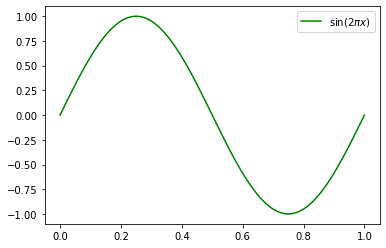

In [4]:
x, f_x = create_sinusoidal_data(0, 100)
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# (1.1) Aumentamos el numero de datos de entrenamiento y validacion

## Muestra Ruidosa

Tomaremos puntos uniformes en $x$, ruidosos en $y$.

### 50 Datos

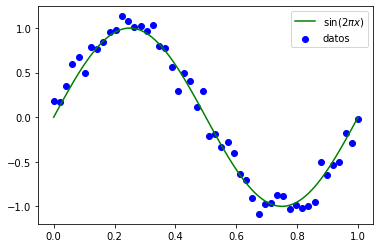

In [5]:
data_size = 50
X, y = create_sinusoidal_data(0.10, data_size)

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [6]:
X

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [7]:
y

array([ 0.17640523,  0.16789288,  0.35152838,  0.59935632,  0.67747335,
        0.50038274,  0.79069139,  0.76669576,  0.84482088,  0.95547247,
        0.97307221,  1.13260913,  1.07558999,  1.00754661,  1.01931424,
        0.97183585,  1.03600721,  0.79965643,  0.77158477,  0.56281882,
        0.29023592,  0.4992456 ,  0.40155184,  0.11694213,  0.29104568,
       -0.20950679, -0.18658278, -0.3338266 , -0.28060582, -0.39859902,
       -0.63273365, -0.70246175, -0.90895083, -1.08467895, -0.97325964,
       -0.95929302, -0.87235004, -0.87924823, -1.02591447, -0.98889813,
       -1.01926792, -0.99714456, -0.9524585 , -0.50060501, -0.64907575,
       -0.53452498, -0.50054654, -0.17590555, -0.28926695, -0.02127403])

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [8]:
from sklearn.model_selection import train_test_split

train_size = int(data_size * 0.8)

val_size = int(data_size * 0.2)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=0)

In [9]:
X_train.shape, X_val.shape

((40,), (10,))

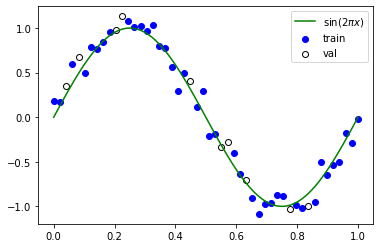

In [10]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Regresión Lineal

Probaremos ajustar los puntos usando una recta.

Vamos a programar a mano el aprendizaje y la predicción.

### Solución de Cuadrados Mínimos

Datos de entrenamiento:
- $X \in R^{N \times K}:$ $N$ vectores de entrada, de $K$ dimensiones cada uno.
- $y \in R^N:$ $N$ valores de salida.

Aprendizaje:

$$w^* = (X^\top X)^{-1} X^\top y$$

Predicción:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

Con $K=1$ tendríamos:

$$f_{w^*}(x) = x_1 w_1^*$$

Para que sea una recta nos falta un $w_0$ ("bias").
Esto se puede resolver haciendo $K=2$ y agregando un valor constante 1 a cada dato:

$$f_{w^*}((1, x)) = w_0 + x_1 w_1^*$$


In [11]:
X_train

array([0.67346939, 0.71428571, 0.53061224, 0.69387755, 0.36734694,
       0.14285714, 0.28571429, 0.91836735, 0.97959184, 0.59183673,
       0.30612245, 0.6122449 , 0.65306122, 0.32653061, 0.85714286,
       0.40816327, 0.87755102, 0.16326531, 0.26530612, 0.51020408,
       0.10204082, 0.34693878, 0.81632653, 1.        , 0.02040816,
       0.24489796, 0.75510204, 0.48979592, 0.12244898, 0.46938776,
       0.73469388, 0.42857143, 0.3877551 , 0.18367347, 0.79591837,
       0.93877551, 0.06122449, 0.        , 0.95918367, 0.89795918])

In [12]:
X_train.shape

(40,)

In [13]:
X_train_bias = np.stack((np.ones(X_train.shape[0]), X_train), axis=1)  # add bias
X_train_bias

array([[1.        , 0.67346939],
       [1.        , 0.71428571],
       [1.        , 0.53061224],
       [1.        , 0.69387755],
       [1.        , 0.36734694],
       [1.        , 0.14285714],
       [1.        , 0.28571429],
       [1.        , 0.91836735],
       [1.        , 0.97959184],
       [1.        , 0.59183673],
       [1.        , 0.30612245],
       [1.        , 0.6122449 ],
       [1.        , 0.65306122],
       [1.        , 0.32653061],
       [1.        , 0.85714286],
       [1.        , 0.40816327],
       [1.        , 0.87755102],
       [1.        , 0.16326531],
       [1.        , 0.26530612],
       [1.        , 0.51020408],
       [1.        , 0.10204082],
       [1.        , 0.34693878],
       [1.        , 0.81632653],
       [1.        , 1.        ],
       [1.        , 0.02040816],
       [1.        , 0.24489796],
       [1.        , 0.75510204],
       [1.        , 0.48979592],
       [1.        , 0.12244898],
       [1.        , 0.46938776],
       [1.

In [14]:
X_train_bias.shape

(40, 2)

In [15]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

### Entrenar

In [16]:
X_train, y_train

(array([0.67346939, 0.71428571, 0.53061224, 0.69387755, 0.36734694,
        0.14285714, 0.28571429, 0.91836735, 0.97959184, 0.59183673,
        0.30612245, 0.6122449 , 0.65306122, 0.32653061, 0.85714286,
        0.40816327, 0.87755102, 0.16326531, 0.26530612, 0.51020408,
        0.10204082, 0.34693878, 0.81632653, 1.        , 0.02040816,
        0.24489796, 0.75510204, 0.48979592, 0.12244898, 0.46938776,
        0.73469388, 0.42857143, 0.3877551 , 0.18367347, 0.79591837,
        0.93877551, 0.06122449, 0.        , 0.95918367, 0.89795918]),
 array([-1.08467895, -0.95929302, -0.18658278, -0.97325964,  0.77158477,
         0.76669576,  1.01931424, -0.53452498, -0.28926695, -0.39859902,
         0.97183585, -0.63273365, -0.90895083,  1.03600721, -0.9524585 ,
         0.29023592, -0.50060501,  0.84482088,  1.00754661, -0.20950679,
         0.50038274,  0.79965643, -1.01926792, -0.02127403,  0.16789288,
         1.07558999, -0.87924823,  0.29104568,  0.79069139,  0.11694213,
        -0.87235

In [17]:
w = linear_least_squares(X_train, y_train)

In [18]:
w  # qué dimensiones tiene w?

array([-1.85218101,  0.96804807])

### Graficar

Graficaremos la función aprendida a partir de los datos de entrenamiento. También graficaremos con los datos de evaluación y la función oculta, para comparar.

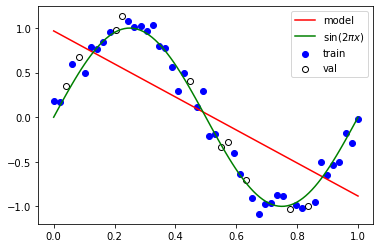

In [19]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, f(x, w), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Predecir y Evaluar: Error Cuadrático Medio

Obtendremos los valores predichos para los datos de entrenamiento y de evaluación.
Calcularemos el error cuadrático medio sobre ambos conjuntos de datos.

In [20]:
y_train_pred = f(X_train, w)
y_val_pred = f(X_val, w)

Usamos la función [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) de scikit-learn:

In [21]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.219761
Val error: 0.171332


Notar que para un n=50 y usando una regresion lineal, el error medio cuadratico es mayor para el grupo de entrenamiento que para el grupo de validacion. Esto puede ser porque el grupo de entranamiento es muy grande y el grupo de validacion muy chico.

## Regresión Polinomial

Ahora haremos regresión polinomial. En este caso usaremos scikit-learn para definir el modelo, entrenar y predecir.

En scikit-learn cada dato de entrada debe ser un vector, no un número. Debemos convertir cada dato en un vector de una dimensión:

In [22]:
X_train.shape, X_val.shape

((40,), (10,))

In [23]:
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_train.shape, X_val.shape

((40, 1), (10, 1))

### Features Polinomiales

En scikit-learn, la regresión polinomial se implementa como un modelo de dos pasos.

El primer paso genera vectores de características polinomiales, y el segundo paso aplica una regresión lineal sobre estos vectores (ver [Polynomial interpolation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

### Instanciar y Entrenar

Crearemos y entrenaremos un modelo de grado 2.

Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree) # con esta linea elegimos el grado del polinomio 
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature.
model = make_pipeline(pf, lr)

In [25]:
model.fit(X_train, y_train) # con esta linea entrenamos al modelo

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [26]:
# equivalente a:
Z_train = pf.fit_transform(X_train, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

### Inspeccionar Parámetros

Ver [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [27]:
lr.coef_

array([ 1.01520954, -2.12908785,  0.26944371])

In [28]:
lr.intercept_

0.0

### Graficar Resultado

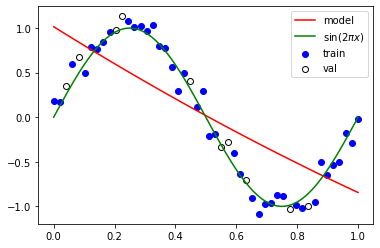

In [29]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

**IMPORTANTE! Notar que el polinomio de grado 2 se parece bastante a una recta. Es decir que agregar mas datos tuvo un efecto similar a lo que se obtiene cuando se incorpora un termino de regularizacion a la funcion de costo (ver mas adelante). recordemos que la regularizacion introduce un termino que penaliza los valores grandes de Wm lo cual tiene como efecto suavizar la funcion (la curva).** 

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [30]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [31]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 0.22
Test error: 0.17


## Sobreajuste vs. Generalización

Probaremos polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

In [32]:
train_errors = []
val_errors = []
degrees = list(range(9))
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [33]:
train_errors, val_errors

([0.5250966700725168,
  0.2197607167630769,
  0.2193109185687224,
  0.017932877985516987,
  0.017908877855348785,
  0.011503040166181273,
  0.011411580464409316,
  0.011409940894175689,
  0.011402882970797607],
 [0.570052178960122,
  0.17133168216037867,
  0.173140323830908,
  0.00515951213418823,
  0.005043459665733591,
  0.00813169768318448,
  0.008917625953703247,
  0.008969786781077677,
  0.008855460846856015])

Graficaremos las curvas de error en términos del grado del polinomio.

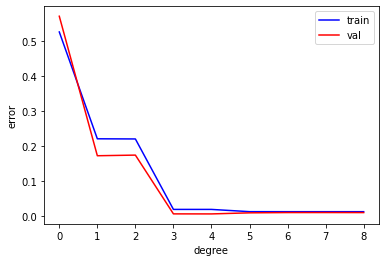

In [34]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

A diferencia de lo que observabamos cuando n=15, cuando n=100 no vemos el fenomeno de sobre ajuste incluso para polinomios de grado 9. Aun con un modelo ajustado por un polinomio de grado 9 vemos que el modelo funciona bien

### a partir de que grado empieza a fallar el modelo por regresion polinomilal?

In [35]:
train_errors = []
val_errors = []
degrees = list(range(30))
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

In [36]:
train_errors, val_errors

([0.5250966700725168,
  0.2197607167630769,
  0.2193109185687224,
  0.017932877985516987,
  0.017908877855348785,
  0.011503040166181273,
  0.011411580464409316,
  0.011409940894175689,
  0.011402882970797607,
  0.011179741699655176,
  0.0111412615930228,
  0.01101498590193668,
  0.010039959477437526,
  0.009973000822686559,
  0.009959179014794664,
  0.008907703290580235,
  0.008822426962678756,
  0.008712951840165396,
  0.0068930287503190715,
  0.006086876220748503,
  0.0058728005635879914,
  0.005944397829858999,
  0.0053313249035338624,
  0.005484509895964449,
  0.005625276438908605,
  0.0048154705902961675,
  0.004913108969647463,
  0.005063872658342577,
  0.005215146778103783,
  0.004502658950054124],
 [0.570052178960122,
  0.17133168216037867,
  0.173140323830908,
  0.00515951213418823,
  0.005043459665733591,
  0.00813169768318448,
  0.008917625953703247,
  0.008969786781077677,
  0.008855460846856015,
  0.008295323137043729,
  0.008487952664324257,
  0.008333049548976849,
  0.0

Graficaremos las curvas de error en términos del grado del polinomio.

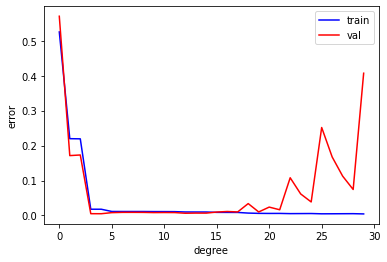

In [37]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [38]:
degree = 30
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=30)),
                ('linearregression', LinearRegression())])

Graficamos:

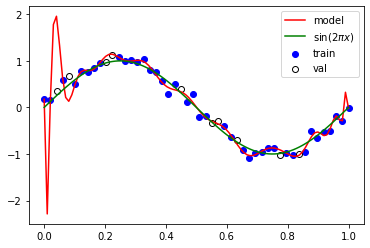

In [39]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Mejor Modelo

De acuerdo a la gráfica anterior, y como era de esperarse, el modelo que mejor ajusta los datos es el de grado 3:

In [40]:
# w = 5 o w = 8 son buenos ajustes. Podemos usar cualquiera de los dos
degree = 8
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train);

Graficamos:

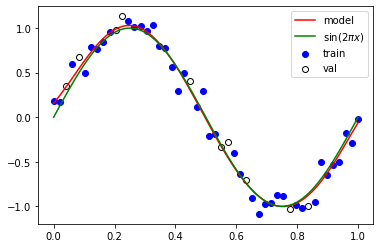

In [41]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [42]:
train_errors[3], val_errors[3]

(0.017932877985516987, 0.00515951213418823)

# (1.3) Regularizacion Ridge

Vamos a trabajar con el caso de n = 15 ya que era mas sencillo observar el efecto de sobreajuste

In [ ]:
'''
sklearn.linear_model.Ridge(alpha=1.0, 
                           *,
                           fit_intercept=True,
                           normalize='deprecated',
                           copy_X=True,
                           max_iter=None,
                           tol=0.001,
                           solver='auto',
                           positive=False,
                           random_state=None)
                           
'''                           

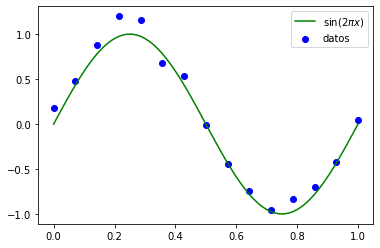

In [43]:
data_size = 15
X, y = create_sinusoidal_data(0.10, data_size)

plt.scatter(X, y, color="blue", label="datos")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [44]:
X

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [45]:
y

array([ 0.17640523,  0.47389946,  0.87970528,  1.19901723,  1.16168371,
        0.68410369,  0.52889258, -0.01513572, -0.44420562, -0.74077163,
       -0.96052356, -0.82950056, -0.70572771, -0.42171624,  0.04438632])

## División en Entrenamiento y Evaluación

Dividiremos aleatoriamente los datos en una parte para entrenamiento y otra para evaluación.

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [46]:
from sklearn.model_selection import train_test_split

train_size = int(data_size * 0.5)

val_size = int(data_size * 0.5)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=0)

In [47]:
X_train, X_val

(array([0.71428571, 0.5       , 0.78571429, 0.21428571, 0.        ,
        0.35714286, 0.85714286]),
 array([0.07142857, 0.42857143, 0.57142857, 0.64285714, 1.        ,
        0.28571429, 0.14285714, 0.92857143]))

In [48]:
X_train.shape, X_val.shape

((7,), (8,))

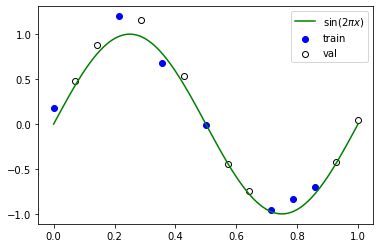

In [49]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### Instanciar y Entrenar
Como siempre en scikit-learn, para entrenar usamos la función **fit**.

In [50]:
# transformamos las dimensiones de los datos de entrenamiento y validacion
X_train = X_train.reshape(-1, 1)
X_val = X_val.reshape(-1, 1)
X_train.shape, X_val.shape

((7, 1), (8, 1))

In [51]:
X_train, X_val

(array([[0.71428571],
        [0.5       ],
        [0.78571429],
        [0.21428571],
        [0.        ],
        [0.35714286],
        [0.85714286]]),
 array([[0.07142857],
        [0.42857143],
        [0.57142857],
        [0.64285714],
        [1.        ],
        [0.28571429],
        [0.14285714],
        [0.92857143]]))

In [75]:
# Machine Learning
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.01, solver = 'auto') # con esta linea definimos el modelo de regresion
ridge_reg.fit(X_train, y_train) # con esta linea entrenamos al modelo


Ridge(alpha=0.01)

### Predecir y Evaluar

Para predecir, usamos la función **predict**:

In [76]:
y_train_pred = ridge_reg.predict(X_train)
y_val_pred = ridge_reg.predict(X_val)

In [77]:
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_val, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 0.22
Test error: 0.35


Graficamos:

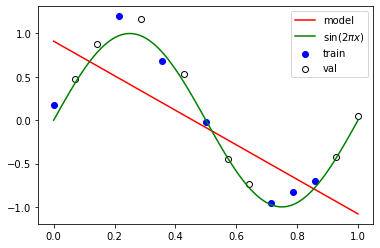

In [78]:
plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_val, y_val, color="white", edgecolor="k", label="val")
plt.plot(x, ridge_reg.predict(x.reshape(-1, 1)), color="red", label="model")
plt.plot(x, f_x, color="green", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

## Referencias

Scikit-learn:

- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
